### Newsvendor Model

Newsvendor model is a classic problem in operations research and analytics. With fixed prices of newspapers, it requires a decision about the quantity of newspapers to buy based on the number of sales of high uncertainty in order to maximize the profits. The solution to the problem is a combination of optimization and numerical simulation.

The problem is discussed and solved in the class of Operations Analytics Week 4. Below, we describe the implementation of our solution and it is a replacement of the Excel spreadsheets given in the class.

In [1]:
# load necessary libraries
from numpy import *
from scipy.optimize import minimize

Here we make the simulation of the quantity of demands. The demands follow a Normal distribution, with a mean value of 52.81 and a standard deviation of 15.1. This is in line with the parameters in lecture.

In [2]:
global N
global demands
N = 100
mu = 52.81; sigma = 15.1
demands = random.normal(mu, sigma, N)

We define the function to compute the profits. Note, we return 3 outputs from the function. Since the minimize function in the optimization only accepts a single output, we give an indicator to show which argument to return.

In [3]:
def profitFunc(quantity, nArgs):
    price = 12; unit_cost = 3
    profits = []
    for n in range(N):
        profits.append(round(price * min(quantity, demands[n]) - unit_cost * quantity, 2))
    return (- mean(profits), std(profits), profits)[nArgs]

Here we calculate the newsvendor problem. Note we have a constraint to ensure the uncertainty of profits (standard deviation) below 125.

In [4]:
def newsvendor():
    quantity0 = 60
    # Objective function
    cons = ({'type': 'ineq', 'fun': lambda x: 125 - profitFunc(x, 1)})
    bnds = [(0, None)]
    res = minimize(profitFunc, quantity0,  args=(0), method='SLSQP', bounds=bnds,
        constraints=cons)
    x = round(res.x, 1)
    return x, - profitFunc(x, 0)

Now, we can get the optimal profit, its optimal quantity and the entire profits with respect to the optimal quantity.

In [5]:
quantity_opt, profit_opt = newsvendor()
profits = profitFunc(quantity_opt, 2)
print quantity_opt
print("The optimal quantity to purchase into the stock is %s" % (str(quantity_opt)))
print("The maximum profit is %s" % (str(profit_opt)))

60.0
The optimal quantity to purchase into the stock is 60.0
The maximum profit is 419.8709


We plot the demands at random time, and its histogram.

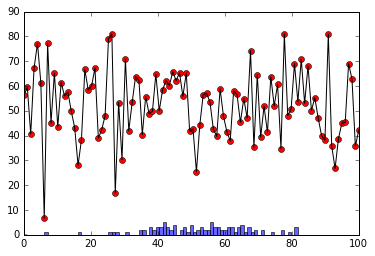

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
bins = linspace(0, 100, N)
plt.plot(bins, demands, 'ro', bins, demands, 'k')
plt.hist(demands, bins, alpha=.6)
plt.show()

We can also plot the profit made by the optimal copies of newspapers.

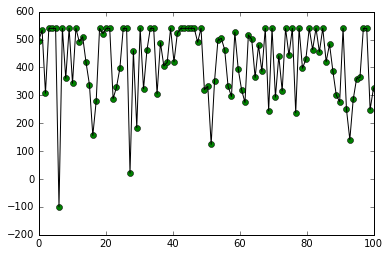

In [7]:
plt.plot(bins, profits, 'go', bins, profits, 'k')
plt.show()